# HW4

## Problem 1

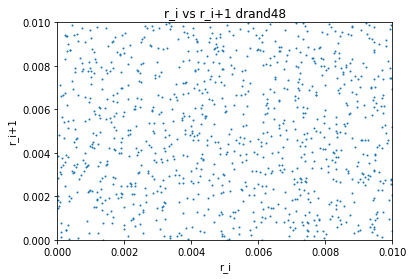

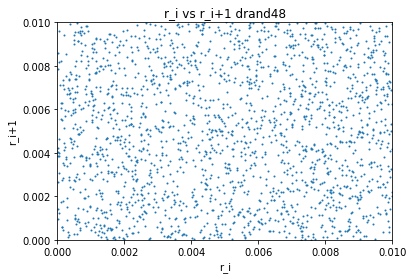

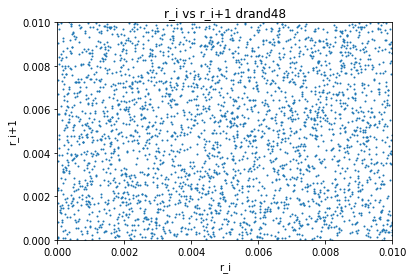

In [71]:
"""
    Random number generation using linear congruent method
    
    Lev Kaplan 2019
"""

# rand1.py: experimenting with random numbers 

from pylab import *

def drand48():
    global rnd
    rnd = (0o273673163155 * rnd + 11) % 2**48    # 0o means octal notation
    return rnd/2**48   # return number between 0 and 1
    
def random_plots(func_N):
    rnd = 1
    N = func_N

    xlist = []
    ylist = []

    x1 = drand48()
    for i in range(0,N):   # collect N pairs of adjacent random numbers
        x2 = x1
        x1 = drand48()
        if x1<=0.01 and x2<0.01:
            xlist.append(x1)
            ylist.append(x2)

    scatter(xlist,ylist,s=1)   # scatter plot with points of size 1
    xlabel('r_i')
    ylabel('r_i+1')
    title('r_i vs r_i+1 drand48')
    xlim(0, 0.01)
    ylim(0, 0.01)
    show()

arr = [10000000, 20000000, 30000000]
for i in range(len(arr)):
    random_plots(arr[i])

When you increase N, the points are still random

## Problem 2

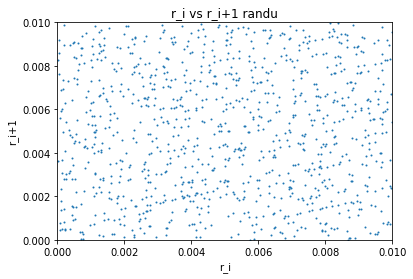

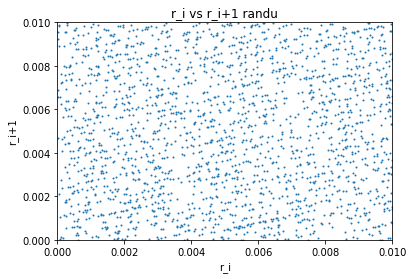

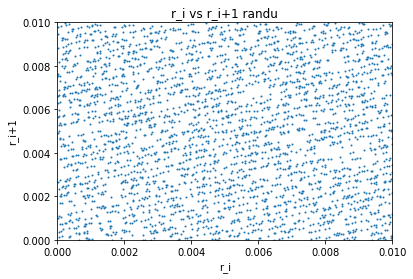

In [72]:
"""
    Random number generation using linear congruent method
    
    Lev Kaplan 2019
"""

# rand1.py: experimenting with random numbers 

from pylab import *

# def drand48():
#     global rnd
#     rnd = (0o273673163155 * rnd + 11) % 2**48    # 0o means octal notation
#     return rnd/2**48   # return number between 0 and 1

def randu():
    global rnd
    rnd = (65539 * rnd % 2**31)
    return rnd/2**31

def randu_plots(func_N):
    rnd = 1   # set seed to 1
    N = func_N

    xlist = []
    ylist = []

    x1 = randu()
    for i in range(0,N):   # collect N pairs of adjacent random numbers
        x2 = x1
        x1 = randu()
        if x1<=0.01 and x2<0.01:
            xlist.append(x1)
            ylist.append(x2)

    scatter(xlist,ylist,s=1)   # scatter plot with points of size 1
    xlabel('r_i')
    ylabel('r_i+1')
    title('r_i vs r_i+1 randu')
    xlim(0, 0.01)
    ylim(0, 0.01)
    show()

arr = [10000000, 20000000, 30000000]
for i in range(len(arr)):
    randu_plots(arr[i])


Starting to notice a pattern...I believe that this makes sense for randu since we only divide by 2**31 and this is essentially a cycle

## Problem 3

First, for drand48:

In [80]:
"""
    Random number generation using linear congruent method
    
    Lev Kaplan 2019
"""

# rand1.py: experimenting with random numbers 

from pylab import *

def drand48():
    global rnd
    rnd = (0o273673163155 * rnd + 11) % 2**48    # 0o means octal notation
    return rnd/2**48   # return number between 0 and 1
    
def problem_3_drand(func_N):
    rnd = 1   # set seed to 1

    N = func_N

    xlist = []
    ylist = []

    x1 = drand48()
    sum_q = 0
    sum_x1 = 0
    sum_x2 = 0
    for i in range(0,N):   # collect N pairs of adjacent random numbers
        x2 = x1
        x1 = drand48()
        sum_q += (x1**2)*(x2**2)
        sum_x1 += x1**2
        sum_x2 += x2**2

    q = sum_q / N
    average_x1 = sum_x1/N
    average_x2 = sum_x2/N

    product = average_x1 * average_x2
    print("N = " + str(N) + ":")
    print("Q for drand48 = " + str(q))
    print("Product of averages for drand48 = " + str(product))
    err_perc = abs(((q-product)/q)*100)
    print("Percent difference between computed averages: " + str(err_perc))
    print("\n")

arr = [10000, 100000, 1000000, 10000000, 30000000]
for i in range(len(arr)):
    problem_3_drand(arr[i])

N = 10000:
Q for drand48 = 0.10986135735643368
Product of averages for drand48 = 0.1112864829211566
Percent difference between computed averages: 1.297203674718172


N = 100000:
Q for drand48 = 0.1116624385709912
Product of averages for drand48 = 0.11189688514944049
Percent difference between computed averages: 0.209960109639048


N = 1000000:
Q for drand48 = 0.11105193897592844
Product of averages for drand48 = 0.11099392894636119
Percent difference between computed averages: 0.0522368453015691


N = 10000000:
Q for drand48 = 0.11099837085718815
Product of averages for drand48 = 0.1109884784912964
Percent difference between computed averages: 0.008912172147541184


N = 30000000:
Q for drand48 = 0.1111040394219723
Product of averages for drand48 = 0.11111077636460474
Percent difference between computed averages: 0.006063634290424643




Now for randu():

In [88]:
"""
    Random number generation using linear congruent method
    
    Lev Kaplan 2019
"""

# rand1.py: experimenting with random numbers 

from pylab import *

# def drand48():
#     global rnd
#     rnd = (0o273673163155 * rnd + 11) % 2**48    # 0o means octal notation
#     return rnd/2**48   # return number between 0 and 1

def randu():
    global rnd
    rnd = (65539 * rnd % 2**31)
    return rnd/2**31


def problem_3_randu(func_N):
    rnd = 1   # set seed to 1

    N = func_N

    xlist = []
    ylist = []

    x1 = randu()
    sum_q = 0
    sum_x1 = 0
    sum_x2 = 0
    for i in range(0,N):   # collect N pairs of adjacent random numbers
        x2 = x1
        x1 = randu()
        sum_q += (x1**2)*(x2**2)
        sum_x1 += x1**2
        sum_x2 += x2**2

    q = sum_q / N
    average_x1 = sum_x1/N
    average_x2 = sum_x2/N

    product = average_x1 * average_x2
    
    print("N = " + str(N) + ":")
    print("Q for randu = " + str(q))
    print("Product of averages for randu = " + str(product))
    err_perc = abs(((q-product)/q)*100)
    print("Percent difference between computed averages: " + str(err_perc))
    print("\n")

arr = [10000, 100000, 1000000, 10000000, 30000000]
for i in range(len(arr)):
    problem_3_randu(arr[i])

N = 10000:
Q for randu = 0.10785693846327961
Product of averages for randu = 0.10945646258715283
Percent difference between computed averages: 1.4830053093133062


N = 100000:
Q for randu = 0.11068769611184773
Product of averages for randu = 0.11054320210274472
Percent difference between computed averages: 0.13054206942476848


N = 1000000:
Q for randu = 0.11153934417376397
Product of averages for randu = 0.1116325953833022
Percent difference between computed averages: 0.08360387110843079


N = 10000000:
Q for randu = 0.1109571018906422
Product of averages for randu = 0.11097099491185497
Percent difference between computed averages: 0.012521074339577972


N = 30000000:
Q for randu = 0.1110690292086345
Product of averages for randu = 0.11106361724818364
Percent difference between computed averages: 0.004872609843999468




## Problem 4

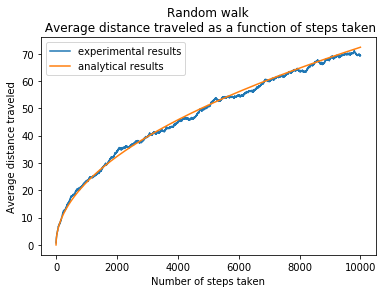

In [13]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation
    
    Adapted by Lev Kaplan 2019"""  

# Walk.py  Random walk in 2 dimensions
    
from pylab import *
from random import *

seed(None)                  # Seed generator, None => use system clock
nwalks = 100   # of walks (trials)
nsteps = 10000   # of stepsfor each walk

ravg=zeros(nsteps)

for w in range(0,nwalks):   # iterate over trials
    x=0; y=0   # Start at origin
    for i in range(0, nsteps):
        x += (random() - 0.5)*2.                        # -1 =< dx =< 1
        y += (random() - 0.5)*2.                        # -1 =< dy =< 1
        r = sqrt(x*x+y*y)   # distance after i steps
        ravg[i] += r     # compute average distance after i steps
        

ravg = ravg / nwalks  
ravg

xax = arange(0, 10000, 1)
ylabel('Average distance traveled')
xlabel('Number of steps taken')
title('Random walk\n Average distance traveled as a function of steps taken')
plot(xax, ravg, label='experimental results')


y = sqrt(xax)*sqrt(math.pi/6)
plot(xax, y, label = 'analytical results')
legend()

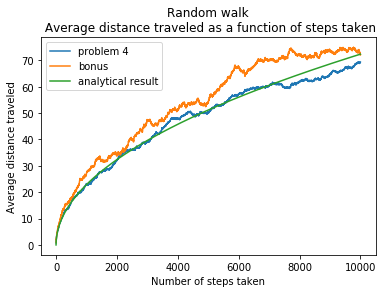

In [15]:
seed(None)                  # Seed generator, None => use system clock
nwalks = 100   # of walks (trials)
nsteps = 10000   # of stepsfor each walk

ravg=zeros(nsteps)

for w in range(0,nwalks):   # iterate over trials
    x=0; y=0   # Start at origin
    for i in range(0, nsteps):
        x += (random() - 0.5)*2.                        # -1 =< dx =< 1
        y += (random() - 0.5)*2.                        # -1 =< dy =< 1
        r = sqrt(x*x+y*y)   # distance after i steps
        ravg[i] += r     # compute average distance after i steps
        

ravg = ravg / nwalks  
ravg

xax = arange(0, 10000, 1)
ylabel('Average distance traveled')
xlabel('Number of steps taken')
title('Random walk\n Average distance traveled as a function of steps taken')
plot(xax, ravg, label='problem 4')

# y = sqrt(xax)*0.7071067812 #sqrt(x_avg^2+y_avg^2) euclidean distance
# scatter(xax, y, s=1)

seed(None)                  # Seed generator, None => use system clock
nwalks = 100   # of walks (trials)
nsteps = 10000   # of stepsfor each walk

ravg=zeros(nsteps)

for w in range(0,nwalks):   # iterate over trials
    x=0; y=0   # Start at origin
    for i in range(0, nsteps):
        u = randint(0, 3)
        if u == 0:
            x += 1
        if u == 1:
            x += -1
        if u == 2:
            x += 1
        if u == 3:
            x += -1
        r = sqrt(x*x+y*y)   # distance after i steps
        ravg[i] += r     # compute average distance after i steps
        

ravg = ravg / nwalks  
ravg

xax = arange(0, 10000, 1)
ylabel('Average distance traveled')
xlabel('Number of steps taken')
title('Random walk\n Average distance traveled as a function of steps taken')
plot(xax, ravg, label='bonus')
y = sqrt(xax)*sqrt(math.pi/6)
plot(xax, y, label='analytical result')
legend()




## Problem 5

Error percentage for 2^1 = 22.223675892362202

Error percentage for 2^2 = 30.01460146997712

Error percentage for 2^3 = 16.386632803987915

Error percentage for 2^4 = 9.195676094321945

Error percentage for 2^5 = 10.438367865277371

Error percentage for 2^6 = 4.344925657054138

Error percentage for 2^7 = 3.0739311289903113

Error percentage for 2^8 = 1.981826140215649

Error percentage for 2^9 = 2.4256280584107106

Error percentage for 2^10 = 1.313186601949698

Error percentage for 2^11 = 0.11297976557162223

Error percentage for 2^12 = 0.1712801672089511

Error percentage for 2^13 = 0.09720200826599294

Error percentage for 2^14 = 0.2288393995408272

Error percentage for 2^15 = 0.05246585100210616

Error percentage for 2^16 = 0.1083259747032811

Error percentage for 2^17 = 0.08228083058339607

Error percentage for 2^18 = 0.048054191620788944

Error percentage for 2^19 = 0.032581502992507415

Error percentage for 2^20 = 0.04078590507116213

Error percentage for 2^21 = 0.032081834141812

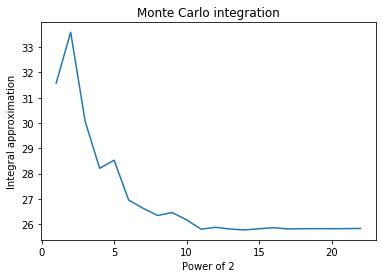

In [8]:
"""
    Ten dimensional Monte Carlo inteaartion
    
    Lev Kaplan 2019
"""

# rand1.py: 10 dimensional monte calro integration

from pylab import *
from random import *

def problem_5(max_num):
    max = 2**max_num   # max number of points

    nlist = []
    values = []
    errlist = []

    y = 0.0
    n = 1

    for i in range(0,max+1):
        x = 0  # reset x
        for j in range(0,10):  # x1 + x2 + ... + x10
            x = x + random()
        y += x*x  # square and sum up

        if i == 2**n:  # sve average after 2, 4, 8, 16, ... points
            nlist.append(n)
            values.append(y/i)
            errlist.append(abs(((y/i)-(155/6))/(155/6))*100)
            n +=1
    plot(nlist, values)
    xlabel('Power of 2')
    ylabel('Integral approximation')
    title('Monte Carlo integration')
    return errlist, nlist
    
    
error, nlist = problem_5(22)

count = 0
for n in nlist:
    print("Error percentage for 2^" + str(n) + " = " + str(error[count]) + "\n")
    count += 1
    